# CRISP DM

```
1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modeling
5. Evaluation
6. Deployment / Kesimpulan
```

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Dataset/customer_personality(cleaned).csv

[Errno 20] Not a directory: '/content/drive/MyDrive/Dataset/customer_personality(cleaned).csv'
/content


# Business Understanding

```
CUSTOMER_PERSONALITY(CLEANED)
Masalah utama bisnis = Pemasaran tidak efektif & sulit memahami pelanggan.

Solusi: Dibuatkan model Machine Learning untuk memprediksi Yes or No (CUSTOMER_PERSONALITY(CLEANED))
```

# Data Understanding

## Penjelasan

```
Memahami Data dan juga Deskriptif dari data tersebut

Data: https://drive.google.com/drive/folders/1s-V9D7s6VfoMjXJ60TNhMZkh13G8cxKH?usp=drive_link
```

```
1. Identitas & Demografi

ID → identitas unik tiap pelanggan.
Year_Birth → tahun lahir → dipakai bisa dihitung umur.
Pendidikan → tingkat pendidikan (Wisuda, PhD, Master, dsb).
Marital_Status → status pernikahan (Lajang, Menikah, Bersama, dll).
Pendapatan → pendapatan tahunan pelanggan.
Kidhome → jumlah anak kecil di rumah.
Teenhome → jumlah remaja di rumah.

2. Hubungan dengan Perusahaan
Dt_Customer → tanggal pertama kali jadi pelanggan.
Kekinian → jumlah hari sejak pembelian terakhir → semakin tinggi, semakin lama tidak belanja.

3. Perilaku Belanja (Pengeluaran)
Jumlah uang (biasanya dalam satuan tertentu, misalnya euro) yang dibelanjakan untuk setiap kategori produk:
MntWines → anggur
MntFruits → buah
MntMeatProducts → daging
MntFishProducts → ikan
MntSweetProducts → makanan manis (permen/kue)
MntGoldProds → produk emas/perhiasan

4. Perilaku Pembelian (Saluran)
NumDealsPurchases → jumlah pembelian karena promo.
NumWebPurchases → pembelian melalui website.
NumCatalogPurchases → pembelian lewat katalog.
NumStorePurchases → pembelian langsung di toko.
NumWebVisitsMonth → jumlah kunjungan ke situs web per bulan.

5. Kampanye Pemasaran
AcceptedCmp1 – AcceptedCmp5 → apakah pelanggan menerima kampanye pemasaran ke-1 s/d ke-5. (0 = tidak, 1 = ya)
Response → apakah pelanggan menerima tawaran dari kampanye terakhir . (0 = tidak, 1 = ya)

```
1. Tujuan Bisnis

Memahami pelanggan lebih dalam : siapa mereka (umur, pendidikan, status), daya beli, dan preferensi belanja.

Meningkatkan efektivitas pemasaran : mengetahui pelanggan mana yang berpotensi menerima kampanye, sehingga biaya iklan tidak sia-sia.

Segmentasi pelanggan : membagi pelanggan ke dalam kelompok (misalnya pembelanja tinggi , keluarga hemat , pembelanja online , dll).

Retensi pelanggan : mengidentifikasi pelanggan yang mulai jarang belanja (Recency tinggi) agar tidak churn.

Strategi produk : mengetahui produk mana yang paling disukai tiap segmen, supaya stok & promo lebih tepat.

2. Tujuan Data Science / Machine Learning

Clustering (Segmentasi Pelanggan)
Mengelompokkan pelanggan tanpa label → siapa saja yang mirip dari sisi pendapatan, belanja, dan saluran.

Klasifikasi (Prediksi Ya/Tidak)

Prediksi Respon → apakah pelanggan akan menerima tawaran pemasaran.

Prediksi Churn → apakah pelanggan akan berhenti berbelanja.

Prediksi Pembelanja Tinggi → apakah pelanggan punya potensi belanja besar.

Regresi (Nilai Belanja / CLV)
Memprediksi Customer Lifetime Value (CLV) → berapa potensi belanja total pelanggan di masa depan.

3. Tujuan Akhir untuk Bisnis

Meningkatkan penjualan dengan promosi yang lebih tepat sasaran.

Mengurangi biaya pemasaran dengan tidak menjanjikan pelanggan yang pasti menolak.

Meningkatkan loyalitas pelanggan dengan strategi retensi yang tepat waktu.

Mengoptimalkan produk & saluran distribusi sesuai preferensi pelanggan.
```

## Read Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/customer_personality(cleaned).csv')


In [ ]:
df.shape

(2216, 26)

```
Ada 2216 baris dan 26 kolom
```

In [ ]:
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,8,10,4,7,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,1,1,2,5,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,8,2,10,4,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,2,0,4,6,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,3,6,5,0,0,0,0,0,0
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,6,4,10,6,0,0,0,0,0,0
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,...,7,3,7,6,0,0,0,0,0,0
7,6177,1985,PhD,Married,33454.0,1,0,2013-08-05,32,76,...,4,0,4,8,0,0,0,0,0,0
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,...,3,0,2,9,0,0,0,0,0,1
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,...,1,0,0,20,1,0,0,0,0,0


menampilkan 10 baris pertama



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

Tambahkan beberapa analisa lainnya terkait data understanding.

Jelasin juga apa fitur X nya dan apa fitur y

X itu adalah fitur dan y adalah target/output

In [ ]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response'],
      dtype='object')

```
Kolom Loan_Status sebagai variabel y
sisanya bisa sebagai variabel X

y = Loan_Status
X = ApplicantIncome, Credit_History, Married, Education, Self_Employed, CoapplicantIncome,
LoanAmount, Loan_Amount_Term, Property_Area
```

# Data Preparation

 Explore Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

df info dijadikan sebuah penjelasan di PPT atau di google colab juga dijelaskan sebagai teks

In [ ]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,4.085289,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.740951,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


ID → nilai min dan max sama (2216.0), artinya semua data memiliki ID yang sama atau itu mungkin data dummy.

Year_Birth → nilai rata-rata sekitar 1970-an, artinya rata-rata tahun lahir pelanggan sekitar tahun itu.

Pendapatan → ada mean, std, min, dan max, ini menunjukkan variasi penghasilan antar pelanggan.

Recency → menunjukkan seberapa lama pelanggan terakhir melakukan transaksi (biasanya dalam hari).

MntWines , MntFruits , MntMeatProducts , dst → adalah total pengeluaran pelanggan untuk kategori produk tertentu.

NumDealsPurchases , NumWebPurchases , dll → menunjukkan jumlah pembelian melalui kanal tertentu.

## Cleaning

In [ ]:
df.isna().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


dropna atau fillna

In [ ]:
df = df.dropna().reset_index(drop=True)

In [ ]:
df.isna().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,8,10,4,7,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,1,1,2,5,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,8,2,10,4,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,2,0,4,6,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,3,6,5,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,9,3,4,5,0,0,0,0,0,0
2212,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,...,8,2,5,7,0,0,0,1,0,0
2213,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,2,3,13,6,0,1,0,0,0,0
2214,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,6,5,10,3,0,0,0,0,0,0


## Encoding Data

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Teenhome '] = le.fit_transform(df['Teenhome'])

In [ ]:
df['Teenhome']

,Teenhome
0,0
1,1
2,0
3,0
4,0
...,...
2211,1
2212,1
2213,0
2214,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

In [ ]:
df['Kidhome'].value_counts()

,count
Kidhome,
0,1283
1,887
2,46


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

In [ ]:
df['Kidhome'] = df['Kidhome'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

In [ ]:
df.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Teenhome
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,10,4,7,0,0,0,0,0,1,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,1,2,5,0,0,0,0,0,0,1
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,2,10,4,0,0,0,0,0,0,0


In [ ]:
df[' Education'] = le.fit_transform(df[' Education '])
df['Income'] = le.fit_transform(df['Income'])
df['Kidhome'] = le.fit_transform(df['Kidhome'])
df['Recency'	] = le.fit_transform(df['Recency	'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2216 non-null   int64 
 1   Year_Birth           2216 non-null   int64 
 2   Education            2216 non-null   object
 3   Marital_Status       2216 non-null   object
 4   Income               2216 non-null   int64 
 5   Kidhome              2216 non-null   int64 
 6   Teenhome             2216 non-null   int64 
 7   Dt_Customer          2216 non-null   object
 8   Recency              2216 non-null   int64 
 9   MntWines             2216 non-null   int64 
 10  MntFruits            2216 non-null   int64 
 11  MntMeatProducts      2216 non-null   int64 
 12  MntFishProducts      2216 non-null   int64 
 13  MntSweetProducts     2216 non-null   int64 
 14  MntGoldProds         2216 non-null   int64 
 15  NumDealsPurchases    2216 non-null   int64 
 16  NumWeb

## EDA

tambahkan beberapa analisa ED dan juga visualisasi

jika data yang telah di encode menganggu analisa EDA maka lakukan EDA sebelum di encode

In [64]:
df.head(1)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Teenhome
0,5524,1957,Graduation,Single,1170,0,0,2012-04-09,58,635,...,10,4,7,0,0,0,0,0,1,0


In [68]:
df.Marital_Status.value_counts()

,count
Marital_Status,
Married,857
Together,573
Single,471
Divorced,232
Widow,76
Alone,3
Absurd,2
YOLO,2


<Axes: xlabel='Marital_Status'>

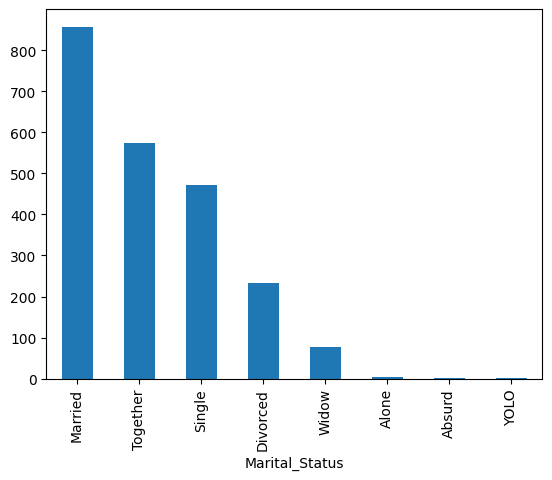

In [70]:
df.Marital_Status.value_counts().plot(kind='bar')

jelasin visualisasi nya

Tambahkan beberapa EDA sesuai dengan analisa masing-masing

## Train Test Split

In [75]:
# 1️⃣ Import library
from sklearn.model_selection import train_test_split

# 2️⃣ Tentukan fitur (X) dan target (y)
X = df[['Year_Birth',
        'Education',
        'Marital_Status',
        'Income',
        'Kidhome',
        'Teenhome',
        'Recency',
        'MntWines',
        'MntFruits',
        'MntMeatProducts',
        'MntFishProducts',
        'MntSweetProducts',
        'MntGoldProds',
        'NumDealsPurchases',
        'NumWebPurchases',
        'NumCatalogPurchases',
        'NumStorePurchases',
        'NumWebVisitsMonth']]

y = df['Response']   # kolom target (yang ingin diprediksi)

# 3️⃣ Bagi data menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,       # 20% data untuk pengujian
    random_state=42,     # supaya hasil selalu sama
    stratify=y           # menjaga proporsi target seimbang
)

# 4️⃣ Cek hasil pembagian data
print("Jumlah total data :", df.shape[0])
print("Data latih (train) :", X_train.shape[0])
print("Data uji (test)    :", X_test.shape[0])

# 5️⃣ (Opsional) Tampilkan contoh data latih
X_train.head()

Jumlah total data : 2216
Data latih (train) : 1772
Data uji (test)    : 444


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
1626,1979,Basic,Together,198,1,0,94,1,3,6,10,0,9,1,1,0,3,5
1002,1951,Master,Married,1205,0,0,56,90,66,165,30,43,11,1,4,2,8,3
665,1985,2n Cycle,Married,513,1,0,13,56,4,76,17,1,18,4,4,1,3,9
869,1975,Graduation,Divorced,523,2,0,78,9,1,5,0,0,1,1,0,0,3,5
266,1981,Master,Together,1727,0,0,29,68,116,396,188,22,15,1,3,3,5,1


In [76]:
len(X_train)

1772

In [77]:
len(X_test)

444

# Modeling Machine Learning

In [ ]:
# 1️Import library utama
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

X = df[['Year_Birth',
        'Education',
        'Marital_Status',
        'Income',
        'Kidhome',
        'Teenhome',
        'Recency',
        'MntWines',
        'MntFruits',
        'MntMeatProducts',
        'MntFishProducts',
        'MntSweetProducts',
        'MntGoldProds',
        'NumDealsPurchases',
        'NumWebPurchases',
        'NumCatalogPurchases',
        'NumStorePurchases',
        'NumWebVisitsMonth']]

y = df['Response']

# 4️⃣ Bagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# 5️⃣ Label Encoding untuk kolom kategori
categorical_cols = ['Education', 'Marital_Status']
le = LabelEncoder()

X_train = X_train.copy()
X_test = X_test.copy()

for col in categorical_cols:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

# 6️⃣ Buat model
model1 = DecisionTreeClassifier(random_state=42)
model2 = RandomForestClassifier(random_state=42)
model3 = LogisticRegression(max_iter=1000, random_state=42)

# 7️⃣ Latih semua model
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)

print("✅ Semua model berhasil dilatih tanpa error!")

In [88]:
from sklearn.preprocessing import LabelEncoder

# Buat salinan agar tidak merusak df asli
X_train_enc = X_train.copy()
X_test_enc = X_test.copy()

# Buat objek encoder
le = LabelEncoder()

# Daftar kolom kategori (string)
categorical_cols = ['Education', 'Marital_Status']

# Ubah masing-masing kolom menjadi angka
for col in categorical_cols:
    X_train_enc[col] = le.fit_transform(X_train_enc[col])
    X_test_enc[col] = le.transform(X_test_enc[col])

# Coba latih ulang model dengan data yang sudah di-encode
model1.fit(X_train_enc, y_train)
model2.fit(X_train_enc, y_train)
model3.fit(X_train_enc, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [89]:
from sklearn.metrics import accuracy_score

y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)
y_pred3 = model3.predict(X_test)

print("Akurasi Decision Tree :", accuracy_score(y_test, y_pred1))
print("Akurasi Random Forest :", accuracy_score(y_test, y_pred2))
print("Akurasi Logistic Reg. :", accuracy_score(y_test, y_pred3))

Akurasi Decision Tree : 0.8288288288288288
Akurasi Random Forest : 0.8671171171171171
Akurasi Logistic Reg. : 0.8490990990990991


# Evaluation

📊 Akurasi Model:
Decision Tree     : 0.8288
Random Forest     : 0.8671
Logistic Regression: 0.8491

📋 Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       377
           1       0.70      0.21      0.32        67

    accuracy                           0.87       444
   macro avg       0.79      0.60      0.62       444
weighted avg       0.85      0.87      0.84       444



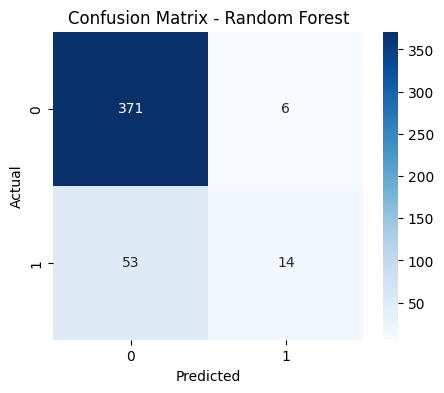

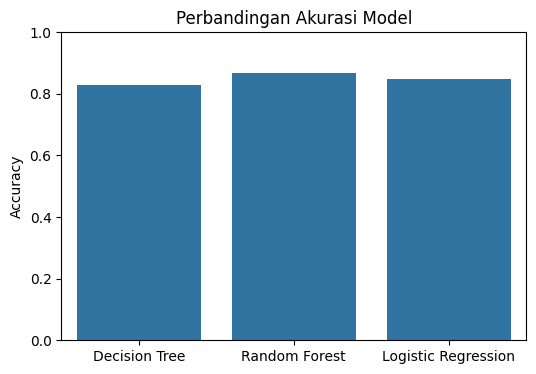

In [90]:
# Import library evaluasi
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Prediksi dari masing-masing model
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)
y_pred3 = model3.predict(X_test)

# Hitung akurasi
acc1 = accuracy_score(y_test, y_pred1)
acc2 = accuracy_score(y_test, y_pred2)
acc3 = accuracy_score(y_test, y_pred3)

# Cetak hasil akurasi
print("📊 Akurasi Model:")
print(f"Decision Tree     : {acc1:.4f}")
print(f"Random Forest     : {acc2:.4f}")
print(f"Logistic Regression: {acc3:.4f}")

# Laporan klasifikasi
print("\n📋 Classification Report (Random Forest):")
print(classification_report(y_test, y_pred2))

# Confusion Matrix untuk Random Forest
cm = confusion_matrix(y_test, y_pred2)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Grafik Perbandingan Akurasi
models = ['Decision Tree', 'Random Forest', 'Logistic Regression']
accuracies = [acc1, acc2, acc3]

plt.figure(figsize=(6,4))
sns.barplot(x=models, y=accuracies)
plt.title("Perbandingan Akurasi Model")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

# Deployment

Kesimpulan


“Proyek prediksi respons pelanggan ini membuktikan bahwa dengan proses Machine Learning yang tepat — mulai dari eksplorasi data, pelatihan model, evaluasi, hingga deployment — sebuah perusahaan dapat membuat keputusan pemasaran yang lebih cerdas, efisien, dan berbasis data.”